In [1]:
from scipy import fft

In [2]:
from numerov import *

In [3]:
length : float = defaultLength

In [4]:
potentialHeight : float = 1

In [5]:
scalar : float = 10000

In [6]:
lengthRatios : list[float] = [1 / 7, 2 / 7, 3 / 7, 4 / 7, 5 / 7, 6 / 7, 7 / 7]

In [7]:
potentialStepHeightRatios : list[float] = [6 / 7, 7 / 7, 4 / 7, 5 / 7, 2 / 7, 3 / 7, 1 / 7]

In [8]:
potentialFunction = partial(
        lambda unitLength, unitPotentialHeight, lengthRatios_, potentialStepHeightRatios_, normalizedPositions_ : \
                stairwell(
                        normalizedPositions_ + (1.0 / 2.0), \
                        unitLength, \
                        unitPotentialHeight, \
                        lengthRatios, \
                        potentialStepHeightRatios
                    ), 
        length, 
        potentialHeight, 
        lengthRatios, 
        potentialStepHeightRatios
    )

In [9]:
results = computeWaveFunction(
        potentialFunction, 
        scalingFactor = scalar, 
        length = length
    )

In [10]:
potential : np.array = results["potential"]

In [11]:
waveFunctions : np.ndarray = results["waveFunctions"]

In [12]:
energies : np.array = results["energies"]

In [13]:
normalizedPositions : np.array = results["normalizedPositions"]

In [14]:
probabilityDistributions : np.ndarray = waveFunctions ** 2

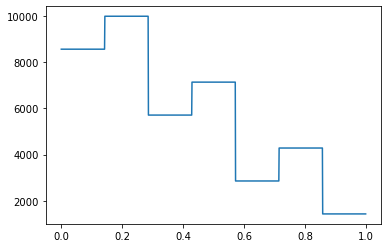

In [15]:
plt.plot(normalizedPositions, potential)

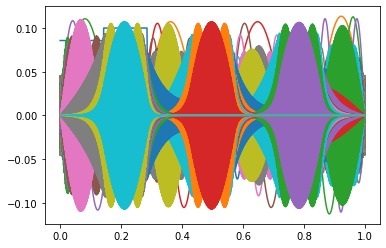

In [16]:
plt.plot(normalizedPositions, potential / scalar / 10)
for waveFunction in waveFunctions:
     plt.plot(normalizedPositions[1:], waveFunction)

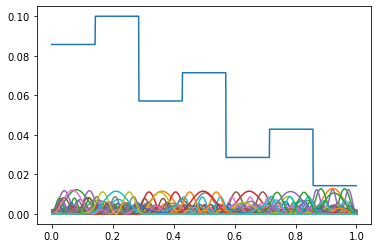

In [17]:
plt.plot(normalizedPositions, potential / scalar / 10)
for distribution in probabilityDistributions:
     plt.plot(normalizedPositions[1:], distribution)

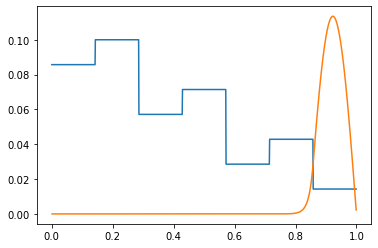

In [18]:
plt.plot(normalizedPositions, potential / scalar / 10)
plt.plot(normalizedPositions[1:], waveFunctions[0])

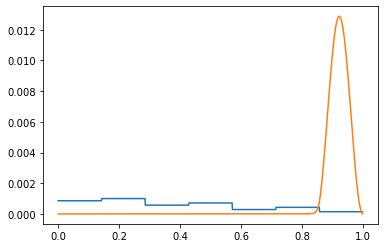

In [19]:
plt.plot(normalizedPositions, potential / scalar / 1000)
plt.plot(normalizedPositions[1:], probabilityDistributions[0])

In [88]:
def regionProbabilitySum(normalizedPositions, probabilityDistribution, from_, to): 
    points = len(normalizedPositions[1:])
    fromPoint = round(points * from_)
    toPoint = round(points * to)
    return np.sum(probabilityDistribution[fromPoint : toPoint])# * normalizedPositions[fromPoint : toPoint])

In [89]:
regionProbabilitySum(normalizedPositions, probabilityDistributions[0], .8, 1)

0.9999988180862651

In [90]:
regionProbabilitySum(normalizedPositions, probabilityDistributions[0], 0, .8)

1.1819137352974505e-06

In [91]:
regionProbabilitySum(normalizedPositions, probabilityDistributions[0], 0, 1)

1.0000000000000007

In [20]:
maxValues : np.array = np.array(list(map(np.max, probabilityDistributions)))
expectationValues : np.array = np.array(list(map(lambda distribution : np.sum(distribution * normalizedPositions[1:]), probabilityDistributions)))

In [21]:
mostProbablePositions : np.array = np.array(list(map(
        lambda probabilityDistribution, maxValue : np.sum(np.where(~(probabilityDistribution == maxValue), 0, normalizedPositions[1:])), 
        probabilityDistributions, 
        maxValues
    )))

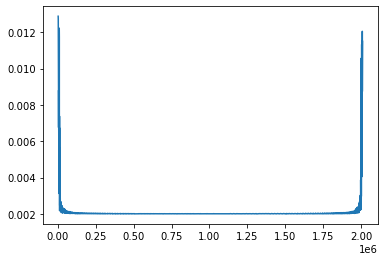

In [22]:
plt.plot(energies, maxValues)

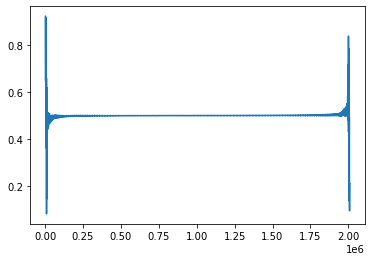

In [23]:
plt.plot(energies, expectationValues)

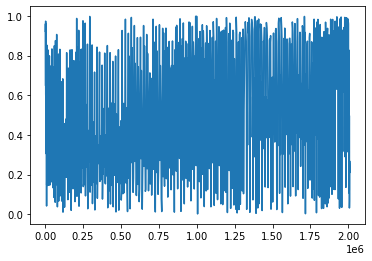

In [24]:
plt.plot(energies, mostProbablePositions)

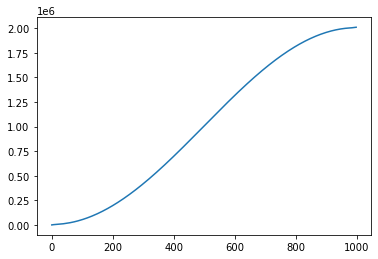

In [25]:
plt.plot(energies)

In [26]:
def binExpectationValuesToRegion(
            expectationValues : np.array, 
            lengthRatios : list, 
            unitLength : float
        ) -> np.array: 
    regionLengths : np.array = np.array([0] + lengthRatios) * unitLength
    expectationRegionBins : np.array = np.zeros(len(energies))
    for ii in range(1, len(regionLengths)): 
            expectationRegionBins = np.where(
                ~((expectationValues < regionLengths[ii]) \
                      & (expectationValues > regionLengths[ii - 1])), 
                expectationRegionBins, 
                ii
            )
    return expectationRegionBins

In [27]:
expectationRegionBins = binExpectationValuesToRegion(expectationValues, lengthRatios, length)

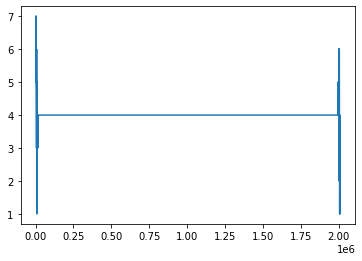

In [28]:
plt.plot(energies, expectationRegionBins)

In [29]:
maxRegionBins = binExpectationValuesToRegion(mostProbablePositions, lengthRatios, length)

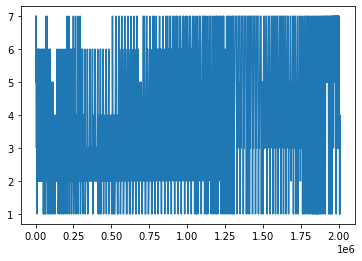

In [30]:
plt.plot(energies, maxRegionBins)

In [31]:
regionPlots : np.ndarray = np.zeros((len(lengthRatios), len(energies)))
for ii, maxRegion in enumerate(maxRegionBins): 
    regionPlots[int(maxRegion) - 1][ii] = mostProbablePositions[ii]

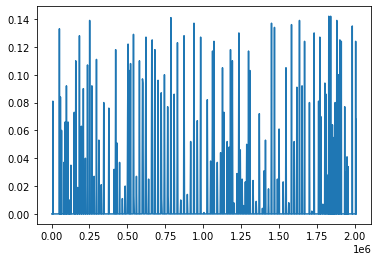

In [32]:
plt.plot(energies, regionPlots[0])

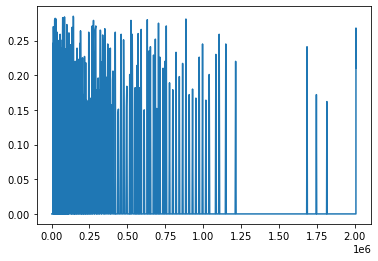

In [33]:
plt.plot(energies, regionPlots[1])

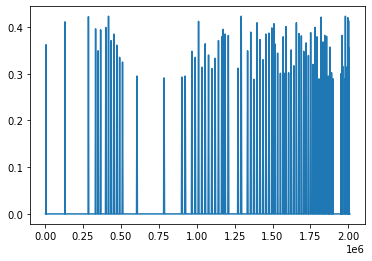

In [34]:
plt.plot(energies, regionPlots[2])

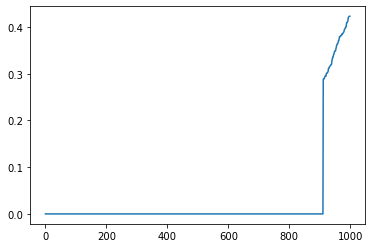

In [35]:
plt.plot(np.sort(regionPlots[2]))

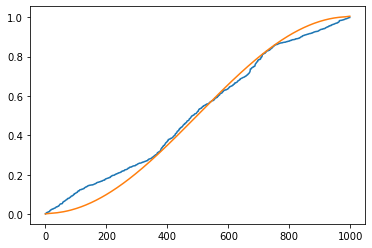

In [36]:
plt.plot(np.sort(mostProbablePositions))
plt.plot(energies / 2e6)

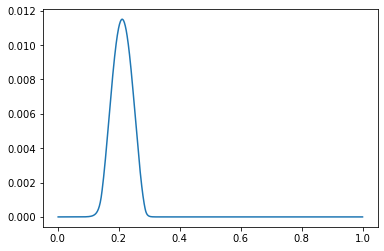

In [37]:
plt.plot(normalizedPositions[1:], probabilityDistributions[998])

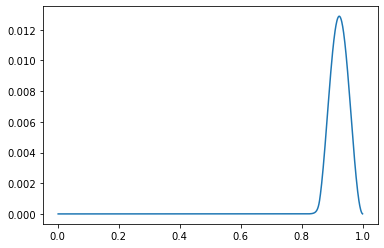

In [38]:
plt.plot(normalizedPositions[1:], probabilityDistributions[0])

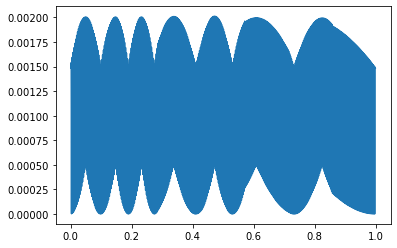

In [39]:
plt.plot(normalizedPositions[1:], probabilityDistributions[330])

/opt/conda/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


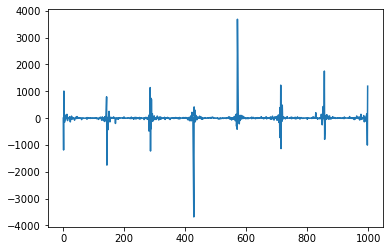

In [40]:
plt.plot(fft.fft(mostProbablePositions) * fft.fft(-1j * mostProbablePositions))

In [41]:
probabilityDistributionLength : int = len(probabilityDistributions[0])

In [42]:
medianIndex : int = round((probabilityDistributionLength - 1) / 2)

In [43]:
medians : np.array = np.array(list(map(lambda probabilityDistribution : probabilityDistribution[medianIndex], probabilityDistributions)))

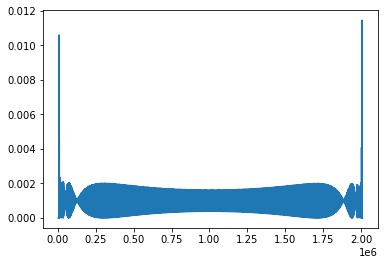

In [44]:
plt.plot(energies, medians)

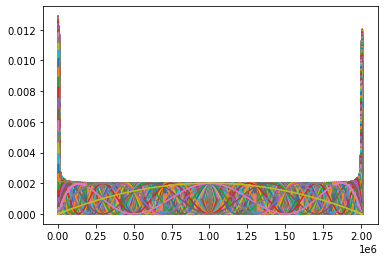

In [45]:
for randomIndex in range(probabilityDistributionLength):
    randomIndexPoints : np.array = np.array(list(map(lambda probabilityDistribution : probabilityDistribution[randomIndex], probabilityDistributions)))
    plt.plot(energies, randomIndexPoints)

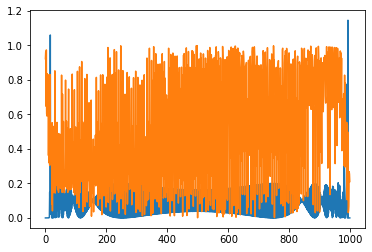

In [46]:
plt.plot(medians * 1e2)
plt.plot(mostProbablePositions)

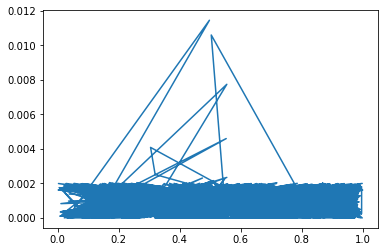

In [47]:
plt.plot(mostProbablePositions, medians)

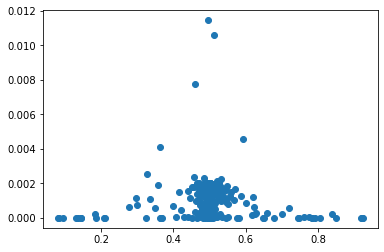

In [48]:
plt.scatter(expectationValues, medians)

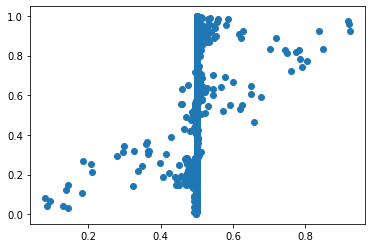

In [49]:
plt.scatter(expectationValues, mostProbablePositions)

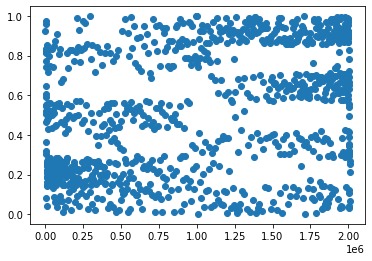

In [50]:
plt.scatter(energies, mostProbablePositions)

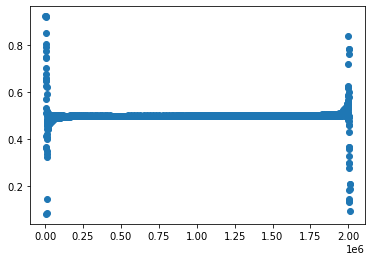

In [51]:
plt.scatter(energies, expectationValues)